# Analisando as notas em geral

In [3]:
import pandas as pd
import seaborn as sns

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [4]:
notas.columns = ("usuarioId", "filmeId", "nota", "momento")
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [5]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas.nota.value_counts()

nota
4.0    11781
3.0     8533
5.0     6093
3.5     5408
4.5     4055
2.0     3085
2.5     1990
1.0     1131
1.5      535
0.5      473
Name: count, dtype: int64

In [7]:
print("Média",notas.nota.mean())
print("Média",notas.nota.median())

Média 3.5669506081143814
Média 4.0


<Axes: ylabel='Frequency'>

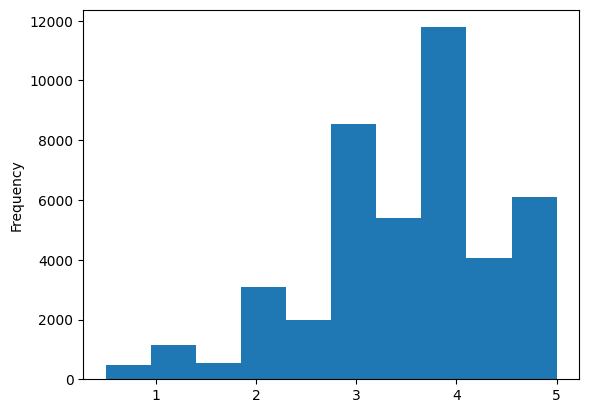

In [8]:
notas.nota.plot(kind="hist")

In [9]:
notas.nota.describe()

count    43084.000000
mean         3.566951
std          1.022535
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

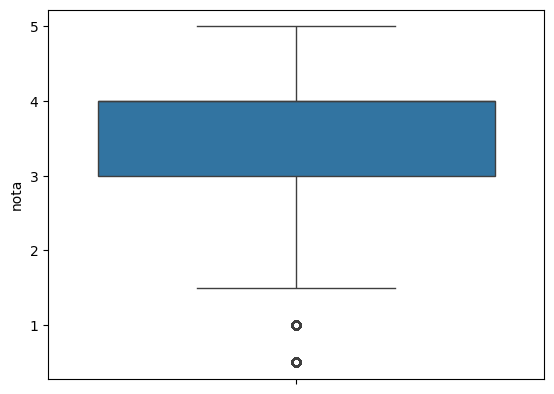

In [10]:
import seaborn as sns
sns.boxplot(notas.nota)

#Olhando os filmes

In [11]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ("filmeId", "titulo", "generos")
filmes.head()
#

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando algumas notas por filme

In [12]:
notas.query("filmeId==1").nota.mean()

3.897196261682243

In [13]:
medias_por_filme = notas.groupby("filmeId").mean()['nota']
medias_por_filme.head()

filmeId
1    3.897196
2    3.366667
3    3.538462
4    2.600000
5    3.480000
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

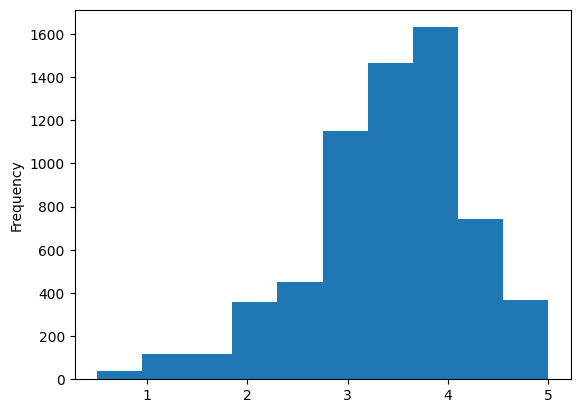

In [14]:
medias_por_filme.plot(kind="hist")

<Axes: ylabel='nota'>

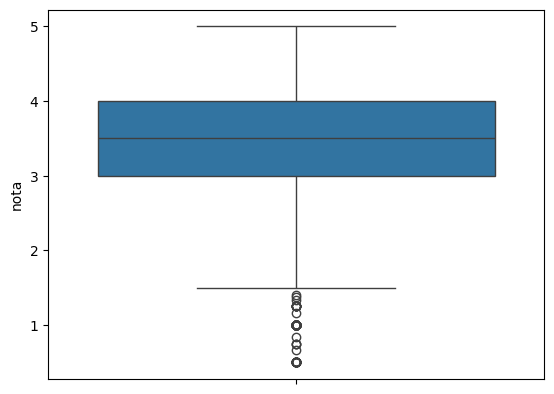

In [15]:
sns.boxplot(medias_por_filme)

In [16]:
medias_por_filme.describe()

count    6433.000000
mean        3.436251
std         0.853154
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota', ylabel='Count'>

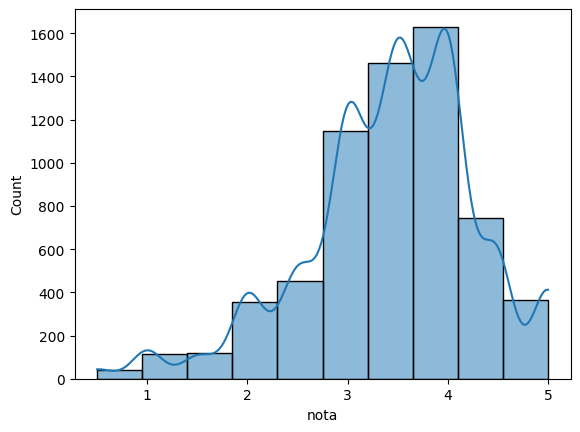

In [17]:
sns.histplot(medias_por_filme, bins=10, kde=True)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

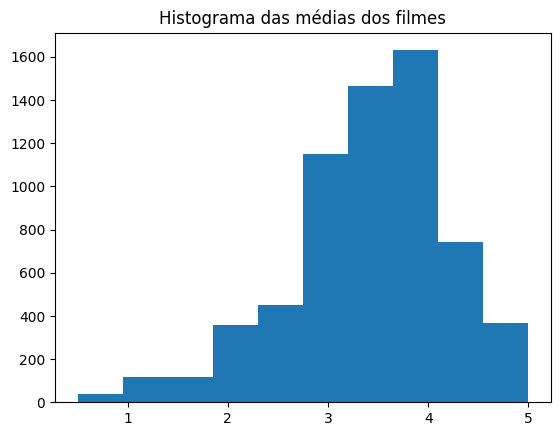

In [18]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [19]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
tmdb.original_language.unique() #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [21]:
#primeiro grau
#segundo grau
#terceiro grau
# 1grau < 2grau < 3grau categorica ordinal

In [22]:
#budget => orcamento => quantitativa continuo

In [23]:
#quantidade de votos > 1, 2, 3, 4, não tem votos fracionados 2.5 por exemplo
#notas do movielens = > 0.5 1 1.5 2 2.5... é fracionado mas por valores definidos não tem 2.7 por exemplo

In [24]:
tmdb.original_language.value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [25]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [26]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [27]:
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ["original_language", "total"]
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

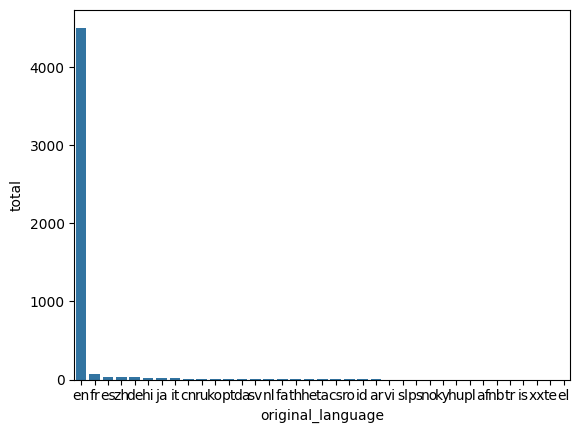

In [28]:
sns.barplot(x="original_language", y="total", data=contagem_de_linguas)

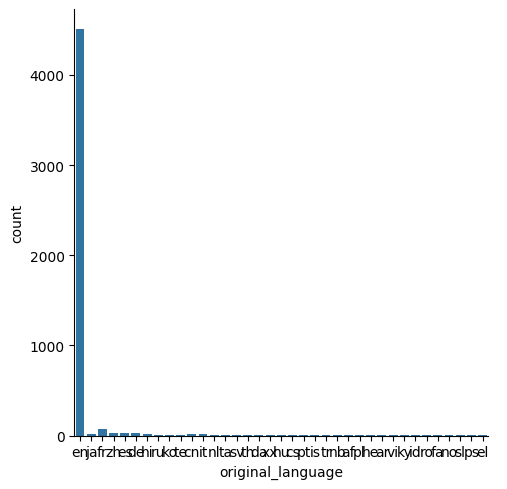

In [29]:
sns.catplot(x="original_language", kind="count", data=tmdb)


([<matplotlib.patches.Wedge at 0x7e761d00d8d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

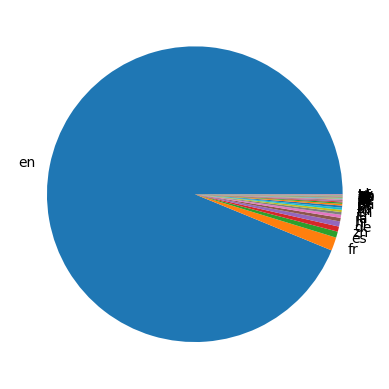

In [30]:
plt.pie(contagem_de_linguas["total"], labels=contagem_de_linguas["original_language"])

In [32]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc["en"]
total_resto = total_geral - total_ingles
print(total_ingles, total_resto)

4505 298


<Axes: xlabel='lingua', ylabel='total'>

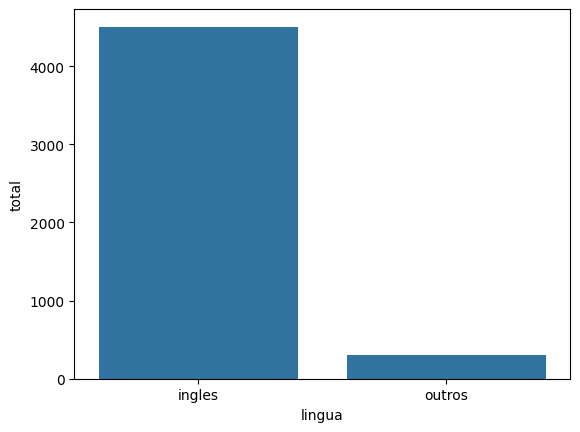

In [33]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_ingles, total_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data=dados)

([<matplotlib.patches.Wedge at 0x7e761f4cf790>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

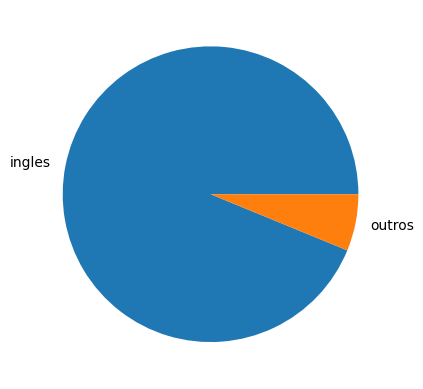

In [34]:
plt.pie(dados["total"], labels=dados["lingua"])

In [37]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

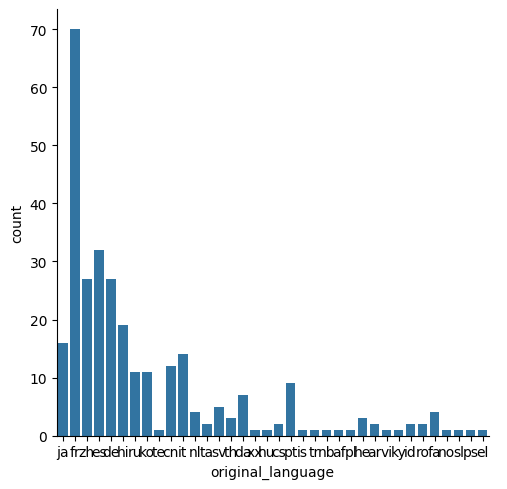

In [46]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_em_ingles)

<ipython-input-44-09f0dd02dcfc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_em_ingles,


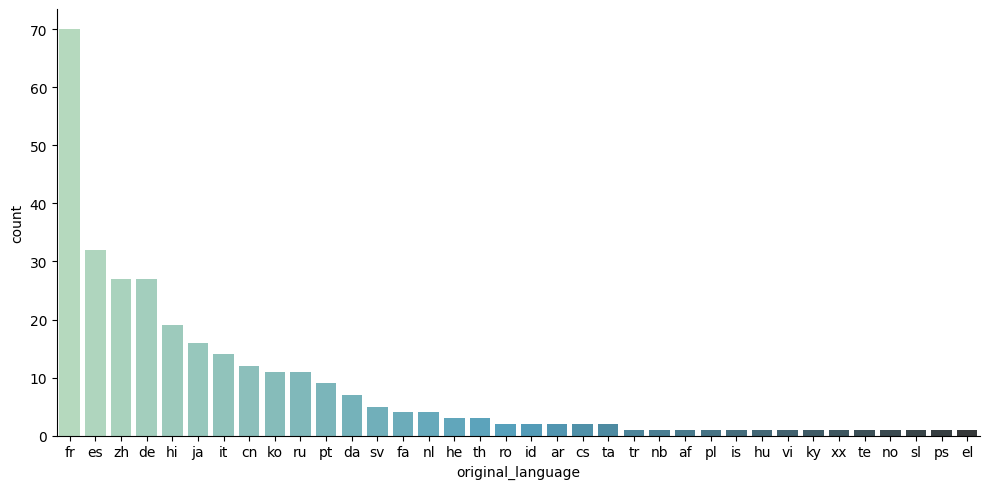

In [44]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_em_ingles,
            aspect=2, height=5,
            palette="GnBu_d",
            order= total_por_lingua_de_outros_filmes.index)

#Revisando o papel na m[edia, mediana, medidas de tendência central, dispersão, desvio padrão, box plot, histograma.

In [48]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [49]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

107 45


In [51]:
print("Nota média do Toy Sotry %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Sotry 3.90
Nota média do Jumanji 3.37


In [53]:
print("Nota médiana do Toy Sotry %.2f" % notas_do_toy_story.nota.median())
print("Nota médiana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota médiana do Toy Sotry 4.00
Nota médiana do Jumanji 3.50


In [83]:
import numpy as np

filme1 = np.append(np.array([2.5]*10), np.array([3.5]*10))
filme2 = np.append(np.array([5]*10), np.array([1]*10))

In [88]:
print(filme1.mean(), filme2.mean())
print(filme1.std(), filme2.std())
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


<ipython-input-58-581cbd9a359d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filme1)
<ipython-input-58-581cbd9a359d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filme2)


<Axes: ylabel='Density'>

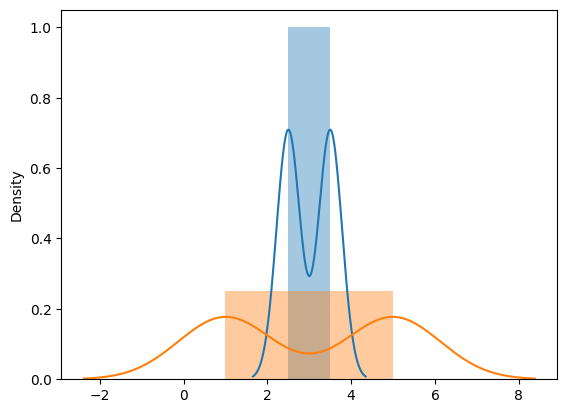

In [58]:
sns.distplot(filme1)
sns.distplot(filme2)

<Axes: ylabel='Count'>

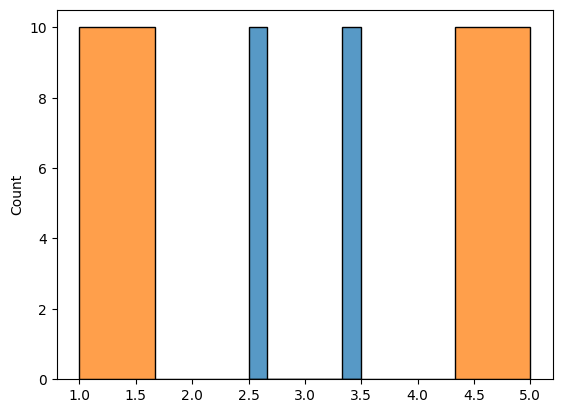

In [75]:
sns.histplot(filme1)
sns.histplot(filme2)


<Axes: >

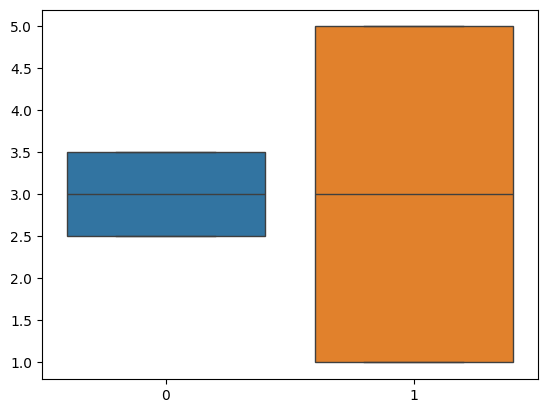

In [60]:
sns.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e761373d5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e76137173a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e761373f700>,
 'medians': [<matplotlib.lines.Line2D at 0x7e7613717820>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e7613716f20>,
 'means': []}

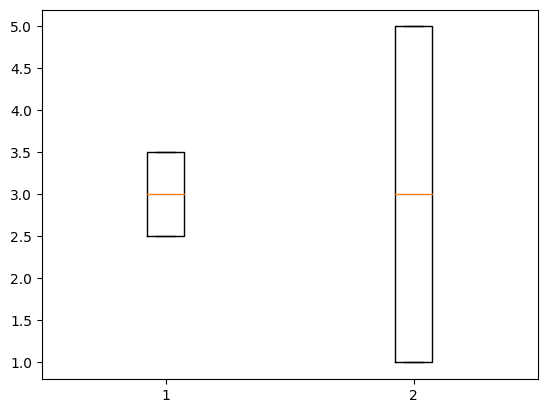

In [61]:
plt.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e76133aad70>,
 'caps': [<matplotlib.lines.Line2D at 0x7e76133a8160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e76133aa920>,
 'medians': [<matplotlib.lines.Line2D at 0x7e76133aa6b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e76133a9e10>,
 'means': []}

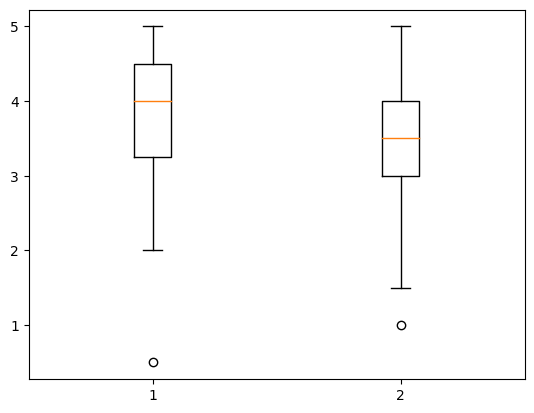

In [71]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

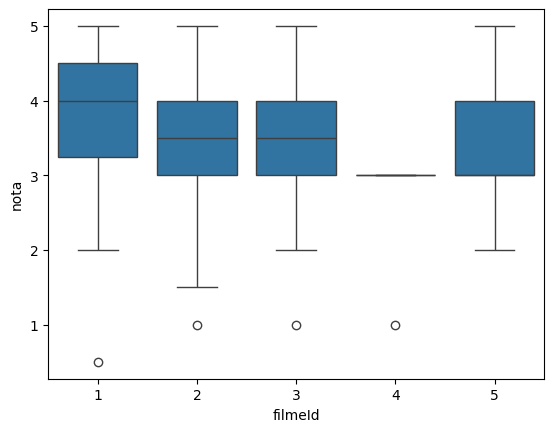

In [73]:
sns.boxplot(x="filmeId", y="nota", data=notas.query("filmeId in (1,2,3,4,5)"))

In [82]:
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())
#desvio padrão

0.881514342815627 0.9132857762447136
